# [A tutorial on statistical-learning for scientific data processing](http://scikit-learn.org/stable/tutorial/statistical_inference/index.html)

#### Statistical learning

Machine learning is a technique with a growing importance, as the size of the datasets experimental sciences are facing is rapidly growing. Problems it tackles range from building a prediction function linking different observations, to classifying observations, or learning the structure in an unlabeled dataset.
This tutorial will explore statistical learning, the use of machine learning techniques with the goal of [statistical inference](https://en.wikipedia.org/wiki/Statistical_inference): drawing conclusions on the data at hand.
Scikit-learn is a Python module integrating classic machine learning algorithms in the tightly-knit world of scientific Python packages (NumPy, SciPy, matplotlib).

## [Statistical learning: the setting and the estimator object in scikit-learn](http://scikit-learn.org/stable/tutorial/statistical_inference/settings.html)

- ### [Datasets](http://scikit-learn.org/stable/tutorial/statistical_inference/settings.html#datasets)

Scikit-learn deals with learning information from one or more datasets that are represented as 2D arrays. They can be understood as a list of multi-dimensional observations. We say that the first axis of these arrays is the **samples** axis, while the second is the **features** axis.

#### A simple example shipped with the scikit: iris dataset

In [41]:
%doctest_mode

Exception reporting mode: Context
Doctest mode is: OFF


In [2]:
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> data = iris.data
>>> data.shape

(150, 4)

It is made of 150 observations of irises, each described by 4 features: their sepal and petal length and width, as detailed in `iris.DESCR`.

In [3]:
# Description example
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

When the data is not initially in the `(n_samples, n_features)` shape, it needs to be preprocessed in order to be used by scikit-learn.

#### An example of reshaping data would be the digits dataset

The digits dataset is made of 1797 8x8 images of hand-written digits

In [4]:
>>> digits = datasets.load_digits()
>>> digits.images.shape

(1797, 8, 8)

In [5]:
>>> import matplotlib.pyplot as plt 
>>> plt.imshow(digits.images[-1], cmap=plt.cm.gray_r) 
plt.show()

To use this dataset with the scikit, we transform each 8x8 image into a feature vector of length 64

In [6]:
>>> data = digits.images.reshape((digits.images.shape[0], -1))

- ### [Estimators objects](http://scikit-learn.org/stable/tutorial/statistical_inference/settings.html#estimators-objects)

**Fitting data**: the main API implemented by scikit-learn is that of the estimator. An estimator is any object that learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data.

All estimator objects expose a `fit` method that takes a dataset (usually a 2-d array):

In [ ]:
>>> estimator.fit(data)

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated or by modifying the corresponding attribute:

In [ ]:
>>> estimator = Estimator(param1=1, param2=2)
>>> estimator.param1

**Estimated parameters**: When data is fitted with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

In [ ]:
>>> estimator.estimated_param

## [Supervised learning: predicting an output variable from high-dimensional observations](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html)

#### The problem solved in supervised learning

[Supervised learning](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) consists in learning the link between two datasets: the observed data X and an external variable y that we are trying to predict, usually called “target” or “labels”. Most often, y is a 1D array of length `n_samples`.

All supervised [estimators](https://en.wikipedia.org/wiki/Estimator) in scikit-learn implement a `fit(X, y)` method to fit the model and a `predict(X)` method that, given unlabeled observations `X`, returns the predicted labels `y`.

#### Vocabulary: classification and regression

If the prediction task is to classify the observations in a set of finite labels, in other words to “name” the objects observed, the task is said to be a **classification** task. On the other hand, if the goal is to predict a continuous target variable, it is said to be a **regression** task.
When doing classification in scikit-learn, `y` is a vector of integers or strings.

Note: See the [Introduction to machine learning with scikit-learn Tutorial](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction) for a quick run-through on the basic machine learning vocabulary used within scikit-learn.

### Nearest neighbor and the curse of dimensionality

#### Classifying irises:

The iris dataset is a classification task consisting in identifying 3 different types of irises (Setosa, Versicolour, and Virginica) from their petal and sepal length and width:

In [8]:
>>> import numpy as np
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> iris_X = iris.data
>>> iris_y = iris.target
>>> np.unique(iris_y)

array([0, 1, 2])

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_iris_dataset_001.png">

#### k-Nearest neighbors classifier

The simplest possible classifier is the [nearest neighbor](https://en.wikipedia.org/wiki/K-nearest_neighbor_algorithm): given a new observation `X_test`, find in the training set (i.e. the data used to train the estimator) the observation with the closest feature vector. (Please see the [Nearest Neighbors section](http://scikit-learn.org/stable/modules/neighbors.html#neighbors) of the online Scikit-learn documentation for more information about this type of classifier.)

#### Training set and testing set
While experimenting with any learning algorithm, it is important not to test the prediction of an estimator on the data used to fit the estimator as this would not be evaluating the performance of the estimator on **new data**. This is why datasets are often split into train and test data.




### **NOTE: The following sections will just include the code exerpts because copying all the figures would take too long.**

In [9]:
import numpy as np
>>> # Split iris data in train and test data
>>> # A random permutation, to split the data randomly
>>> np.random.seed(0)
>>> indices = np.random.permutation(len(iris_X))
>>> iris_X_train = iris_X[indices[:-10]]
>>> iris_y_train = iris_y[indices[:-10]]
>>> iris_X_test  = iris_X[indices[-10:]]
>>> iris_y_test  = iris_y[indices[-10:]]
>>> # Create and fit a nearest-neighbor classifier
>>> from sklearn.neighbors import KNeighborsClassifier
>>> knn = KNeighborsClassifier()
>>> knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
>>> knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [11]:
>>> iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

### Linear model: from regression to sparsity

#### Diabetes dataset

The diabetes dataset consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year:

In [25]:
>>> diabetes = datasets.load_diabetes()
>>> diabetes_X_train = diabetes.data[:-20]
>>> diabetes_X_test  = diabetes.data[-20:]
>>> diabetes_y_train = diabetes.target[:-20]
>>> diabetes_y_test  = diabetes.target[-20:]

### Linear Regression

In [28]:
>>> from sklearn import linear_model
>>> regr = linear_model.LinearRegression()
>>> regr.fit(diabetes_X_train, diabetes_y_train)
>>> print(regr.coef_)

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]


In [29]:
>>> # The mean square error
>>> np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)

2004.5676026898225

In [31]:
>>> # Explained variance score: 1 is perfect prediction
>>> # and 0 means that there is no linear relationship
>>> # between X and y.
>>> regr.score(diabetes_X_test, diabetes_y_test) 

0.58507530226905713

### Shrinkage

If there are few data points per dimension, noise in the observations induces high variance:

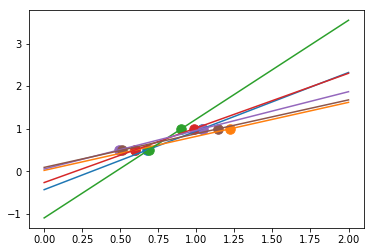

In [56]:
>>> X = np.c_[ .5, 1].T
>>> y = [.5, 1]
>>> test = np.c_[ 0, 2].T
>>> regr = linear_model.LinearRegression()

>>> import matplotlib.pyplot as plt 
>>> plt.figure() 
plt.show()
>>> np.random.seed(0)
>>> for _ in range(6): 
        this_X = .1*np.random.normal(size=(2, 1)) + X # noise
        regr.fit(this_X, y)
        plt.plot(test, regr.predict(test)) 
        plt.scatter(this_X, y, s=50) 

A solution in high-dimensional statistical learning is to shrink the regression coefficients to zero: any two randomly chosen set of observations are likely to be uncorrelated. This is called Ridge regression:

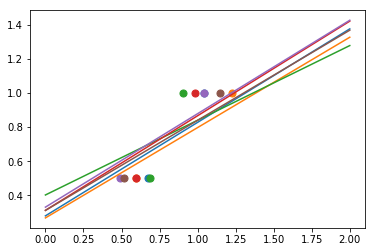

In [66]:
>>> regr = linear_model.Ridge(alpha=.1)

>>> plt.figure() 

>>> np.random.seed(0)
>>> for _ in range(6): 
...    this_X = .1*np.random.normal(size=(2, 1)) + X
...    regr.fit(this_X, y)
...    plt.plot(test, regr.predict(test)) 
...    plt.scatter(this_X, y, s=50) 
plt.show()

This is an example of bias/variance tradeoff: the larger the ridge alpha parameter, the higher the bias and the lower the variance.
We can choose alpha to minimize left out error, this time using the diabetes dataset rather than our synthetic data

In [165]:
>>> alphas = np.logspace(-4, -1, 6)
>>> from __future__ import print_function
>>> print([regr.set_params(alpha=alpha
...             ).fit(diabetes_X_train, diabetes_y_train,
...             ).score(diabetes_X_test, diabetes_y_test) for alpha in alphas]) 

[0.58625626396346409, 0.58635024563292015, 0.58660328593188382, 0.58667141520262966, 0.58418960187045021, 0.57177729362022633]


Note Capturing in the fitted parameters noise that prevents the model to generalize to new data is called overfitting. The bias introduced by the ridge regression is called a regularization.

### Sparsity

Note A representation of the full diabetes dataset would involve 11 dimensions (10 feature dimensions and one of the target variable). It is hard to develop an intuition on such representation, but it may be useful to keep in mind that it would be a fairly empty space.

We can see that, although feature 2 has a strong coefficient on the full model, it conveys little information on y when considered with feature 1.
To improve the conditioning of the problem (i.e. mitigating the The curse of dimensionality), it would be interesting to select only the informative features and set non-informative ones, like feature 2 to 0. Ridge regression will decrease their contribution, but not set them to zero. Another penalization approach, called Lasso (least absolute shrinkage and selection operator), can set some coefficients to zero. Such methods are called sparse method and sparsity can be seen as an application of Occam’s razor: prefer simpler models.

In [174]:
>>> regr = linear_model.Lasso()
>>> scores = [regr.set_params(alpha=alpha
...             ).fit(diabetes_X_train, diabetes_y_train
...             ).score(diabetes_X_test, diabetes_y_test)
...        for alpha in alphas]
>>> best_alpha = alphas[scores.index(max(scores))]
>>> regr.alpha = best_alpha
>>> regr.fit(diabetes_X_train, diabetes_y_train)

Lasso(alpha=0.025118864315095794, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [175]:
>>> print(regr.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982    -0.
 -187.19554705   69.38229038  508.66011217   71.84239008]


#### Different algorithms for the same problem

Different algorithms can be used to solve the same mathematical problem. For instance the Lasso object in scikit-learn solves the lasso regression problem using a coordinate decent method, that is efficient on large datasets. However, scikit-learn also provides the LassoLars object using the LARS algorthm, which is very efficient for problems in which the weight vector estimated is very sparse (i.e. problems with very few observations).

### Classification

For classification, as in the labeling iris task, linear regression is not the right approach as it will give too much weight to data far from the decision frontier. A linear approach is to fit a sigmoid function or logistic function

In [176]:
>>> logistic = linear_model.LogisticRegression(C=1e5)
>>> logistic.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

#### Multiclass classification

If you have several classes to predict, an option often used is to fit one-versus-all classifiers and then use a voting heuristic for the final decision.

#### Shrinkage and sparsity with logistic regression

The C parameter controls the amount of regularization in the LogisticRegression object: a large value for C results in less regularization. penalty="l2" gives Shrinkage (i.e. non-sparse coefficients), while penalty="l1" gives Sparsity.

#### Exercise

Try classifying the digits dataset with nearest neighbors and a linear model. Leave out the last 10% and test prediction performance on these observations.

In [207]:
from sklearn import datasets, neighbors, linear_model

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [230]:
indices = np.random.permutation(len(y_digits))


X_digits_train = X_digits[indices[:-round(len(y_digits)*0.1)]]
y_digits_train = y_digits[indices[:-round(len(y_digits)*0.1)]]
X_digits_test = X_digits[indices[-round(len(y_digits)*0.1):]]
y_digits_test = y_digits[indices[-round(len(y_digits)*0.1):]]

len(y_digits_train) + len(y_digits_test) == len(y_digits)

True

In [227]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_digits_train,y_digits_train).score(X_digits_test,y_digits_test)

0.96666666666666667

In [229]:
logistic = linear_model.LogisticRegression()
logistic.fit(X_digits_train,y_digits_train).score(X_digits_test,y_digits_test)

0.96111111111111114

### Support Vector Machines (SVMs)

Support Vector Machines belong to the discriminant model family: they try to find a combination of samples to build a plane maximizing the margin between the two classes. Regularization is set by the C parameter: a small value for C means the margin is calculated using many or all of the observations around the separating line (more regularization); a large value for C means the margin is calculated on observations close to the separating line (less regularization)

SEE EXAMPLE

SVMs can be used in regression –SVR (Support Vector Regression)–, or in classification –SVC (Support Vector Classification).

In [231]:
>>> from sklearn import svm
>>> svc = svm.SVC(kernel='linear')
>>> svc.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Warning: Normalizing data

For many estimators, including the SVMs, having datasets with unit standard deviation for each feature is important to get good prediction.

#### Using kernels

Classes are not always linearly separable in feature space. The solution is to build a decision function that is not linear but may be polynomial instead. This is done using the kernel trick that can be seen as creating a decision energy by positioning kernels on observations:

#### Interactive example

See the SVM GUI example to download svm_gui.py; add data points of both classes with right and left button, fit the model and change parameters and data.

#### Exercise

Try classifying classes 1 and 2 from the iris dataset with SVMs, with the 2 first features. Leave out 10% of each class and test prediction performance on these observations.

Warning: the classes are ordered, do not leave out the last 10%, you would be testing on only one class.

Hint: You can use the decision_function method on a grid to get intuitions.

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

In [233]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [240]:
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train).score(X_test,y_test)

0.90000000000000002

Solution in Examples/

## [Model selection: choosing estimators and their parameters](http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html)

### Score, and cross-validated scores

As we have seen, every estimator exposes a score method that can judge the quality of the fit (or the prediction) on new data. Bigger is better.

In [241]:
>>> from sklearn import datasets, svm
>>> digits = datasets.load_digits()
>>> X_digits = digits.data
>>> y_digits = digits.target
>>> svc = svm.SVC(C=1, kernel='linear')
>>> svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.97999999999999998

To get a better measure of prediction accuracy (which we can use as a proxy for goodness of fit of the model), we can successively split the data in folds that we use for training and testing:

In [242]:
>>> import numpy as np
>>> X_folds = np.array_split(X_digits, 3)
>>> y_folds = np.array_split(y_digits, 3)
>>> scores = list()
>>> for k in range(3):
...     # We use 'list' to copy, in order to 'pop' later on
...     X_train = list(X_folds)
...     X_test  = X_train.pop(k)
...     X_train = np.concatenate(X_train)
...     y_train = list(y_folds)
...     y_test  = y_train.pop(k)
...     y_train = np.concatenate(y_train)
...     scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
>>> print(scores)

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]


This is called a [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) cross-validation.

### Cross-validation generators

Scikit-learn has a collection of classes which can be used to generate lists of train/test indices for popular cross-validation strategies.

They expose a split method which accepts the input dataset to be split and yields the train/test set indices for each iteration of the chosen cross-validation strategy.


This example shows an example usage of the split method.

In [243]:
>>> from sklearn.model_selection import KFold, cross_val_score
>>> X = ["a", "a", "b", "c", "c", "c"]
>>> k_fold = KFold(n_splits=3)
>>> for train_indices, test_indices in k_fold.split(X):
...      print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [2 3 4 5] | test: [0 1]
Train: [0 1 4 5] | test: [2 3]
Train: [0 1 2 3] | test: [4 5]


In [245]:
>>> kfold = KFold(n_splits=3)
>>> [svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test]) for train, test in k_fold.split(X_digits)]

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]

The cross-validation score can be directly calculated using the cross_val_score helper. Given an estimator, the cross-validation object and the input dataset, the cross_val_score splits the data repeatedly into a training and a testing set, trains the estimator using the training set and computes the scores based on the testing set for each iteration of cross-validation

By default the estimator’s score method is used to compute the individual scores.

Refer the metrics module to learn more on the available scoring methods.

In [262]:
# Complete example in just 5 lines!
>>> from sklearn import datasets, svm
>>> from sklearn.model_selection import KFold, cross_val_score
>>> digits = datasets.load_digits()
>>> svc = svm.SVC(C=1, kernel='poly')
>>> cross_val_score(svc, digits.data, digits.target, cv=KFold(n_splits=5), n_jobs=-1)

array([ 0.98333333,  0.94722222,  0.98328691,  0.98607242,  0.95264624])

n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer.

Alternatively, the scoring argument can be provided to specify an alternative scoring method.

In [248]:
>>> cross_val_score(svc, X_digits, y_digits, cv=k_fold, scoring='precision_macro')

array([ 0.93969761,  0.95911415,  0.94041254])

#### Cross-validation generators

KFold (n_splits, shuffle, random_state)	
Splits it into K folds, trains on K-1 and then tests on the left-out.

StratifiedKFold (n_iter, test_size, train_size, random_state)	
Same as K-Fold but preserves the class distribution within each fold.

GroupKFold (n_splits, shuffle, random_state)  
Ensures that the same group is not in both testing and training sets.

ShuffleSplit (n_iter, test_size, train_size, random_state)	
Generates train/test indices based on random permutation.

StratifiedShuffleSplit	
Same as shuffle split but preserves the class distribution within each iteration.

GroupShuffleSplit  
Ensures that the same group is not in both testing and training sets.

LeaveOneGroupOut ()	
Takes a group array to group observations.

LeavePGroupsOut (p)	  
Leave P groups out.

LeaveOneOut ()  
Leave one observation out.
 
LeavePOut (p)	  
Leave P observations out.

PredefinedSplit  
Generates train/test indices based on predefined splits.

#### Exercise

On the digits dataset, plot the cross-validation score of a SVC estimator with an linear kernel as a function of parameter C (use a logarithmic grid of points, from 1 to 10).

In [282]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

digits = datasets.load_digits()
X = digits.data
y = digits.target

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

[ 0.1013289   0.10183639  0.26342282]
[ 0.1013289   0.10183639  0.26342282]
[ 0.1013289   0.10183639  0.26342282]
[ 0.1013289   0.10183639  0.26342282]
[ 0.1013289   0.10183639  0.26342282]
[ 0.90697674  0.9015025   0.89932886]
[ 0.95348837  0.96160267  0.9295302 ]
[ 0.93853821  0.95826377  0.93791946]
[ 0.93521595  0.95826377  0.93791946]
[ 0.93521595  0.95826377  0.93791946]


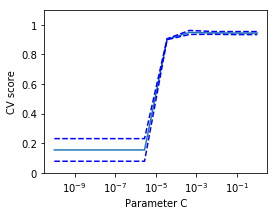

In [281]:
scores = []
std = []
for c in C_s:
    svc.C=c
    scores_c = cross_val_score(svc, digits.data, digits.target)
    scores.append(np.mean(scores_c))
    std.append(np.std(scores_c))
    print(scores_c)
    
import matplotlib.pyplot as plt
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

### Grid-search and cross-validated estimators

#### Grid-search

scikit-learn provides an object that, given data, computes the score during the fit of an estimator on a parameter grid and chooses the parameters to maximize the cross-validation score. This object takes an estimator during the construction and exposes an estimator API:

In [298]:
>>> from sklearn.model_selection import GridSearchCV, cross_val_score
>>> Cs = np.logspace(-6, -1, 10)
>>> clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs), n_jobs=-1)
>>> clf.fit(X_digits[:1000], y_digits[:1000])    

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-06,   3.59381e-06,   1.29155e-05,   4.64159e-05,
         1.66810e-04,   5.99484e-04,   2.15443e-03,   7.74264e-03,
         2.78256e-02,   1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [299]:
>>> clf.best_score_

0.92500000000000004

In [300]:
>>> clf.best_estimator_.C

0.0077426368268112772

In [301]:
>>> # Prediction performance on test set is not as good as on train set
>>> clf.score(X_digits[1000:], y_digits[1000:])  

0.94353826850690092

By default, the GridSearchCV uses a 3-fold cross-validation. However, if it detects that a classifier is passed, rather than a regressor, it uses a stratified 3-fold.

#### Nested cross-validation
    >>>
    >>> cross_val_score(clf, X_digits, y_digits)
    ...                                               
    array([ 0.938...,  0.963...,  0.944...])
    
Two cross-validation loops are performed in parallel: one by the GridSearchCV estimator to set gamma and the other one by cross_val_score to measure the prediction performance of the estimator. The resulting scores are unbiased estimates of the prediction score on new data.

**Warning:** You cannot nest objects with parallel computing (n_jobs different than 1).

### Cross-validated estimators

Cross-validation to set a parameter can be done more efficiently on an algorithm-by-algorithm basis. This is why, for certain estimators, scikit-learn exposes Cross-validation: evaluating estimator performance estimators that set their parameter automatically by cross-validation:

In [306]:
>>> from sklearn import linear_model, datasets
>>> lasso = linear_model.LassoCV()
>>> diabetes = datasets.load_diabetes()
>>> X_diabetes = diabetes.data
>>> y_diabetes = diabetes.target
>>> lasso.fit(X_diabetes, y_diabetes)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [307]:
>>> # The estimator chose automatically its lambda:
>>> lasso.alpha_ 

0.012291895087486173

These estimators are called similarly to their counterparts, with ‘CV’ appended to their name.

#### Exercise

On the diabetes dataset, find the optimal regularization parameter alpha.

Bonus: How much can you trust the selection of alpha?

Automatically created module for IPython interactive environment


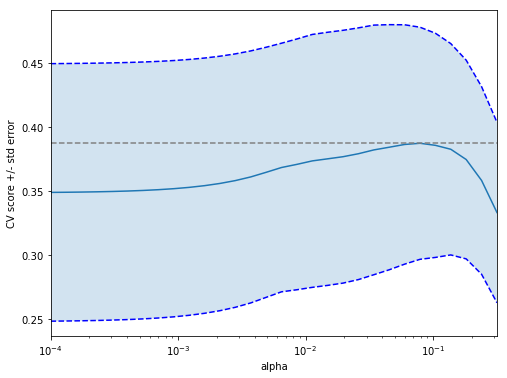

In [342]:
from __future__ import print_function
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

scores = list()
scores_std = list()

n_folds = 3

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_val_score(lasso, X, y, cv=n_folds, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

scores, scores_std = np.array(scores), np.array(scores_std)

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

plt.show()

In [343]:
# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.
lasso_cv = LassoCV(alphas=alphas, random_state=0)
k_fold = KFold(3)

print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()

Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.10405, score: 0.53573
[fold 1] alpha: 0.05968, score: 0.16278
[fold 2] alpha: 0.10405, score: 0.44437

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


## [Unsupervised learning: seeking representations of the data](http://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html)

### Clustering: grouping observations together

#### The problem solved in clustering

Given the iris dataset, if we knew that there were 3 types of iris, but did not have access to a taxonomist to label them: we could try a clustering task: split the observations into well-separated group called clusters.

#### K-means clustering

Note that there exist a lot of different clustering criteria and associated algorithms. The simplest clustering algorithm is K-means.

In [347]:
>>> from sklearn import cluster, datasets
>>> iris = datasets.load_iris()
>>> X_iris = iris.data
>>> y_iris = iris.target

>>> k_means = cluster.KMeans(n_clusters=3)
>>> k_means.fit(X_iris) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [351]:
>>> print(k_means.labels_[::10]) # Extended Slice (gets every 10th argument) (can also be used to reverse a list [::-1])

[1 1 1 1 1 2 2 2 2 2 0 0 0 0 0]


In [357]:
>>> print(y_iris[::10])

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


**Warning:** There is absolutely no guarantee of recovering a ground truth. First, choosing the right number of clusters is hard. Second, the algorithm is sensitive to initialization, and can fall into local minima, although scikit-learn employs several tricks to mitigate this issue.

Example:

Automatically created module for IPython interactive environment


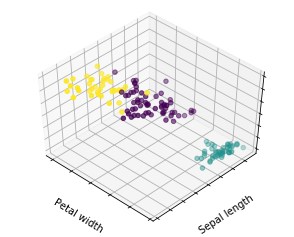

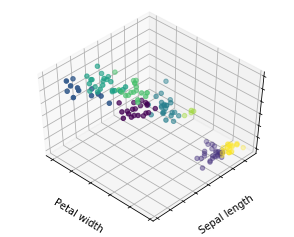

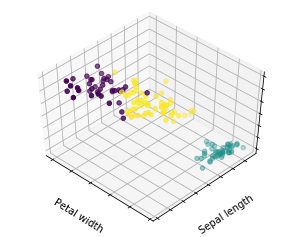

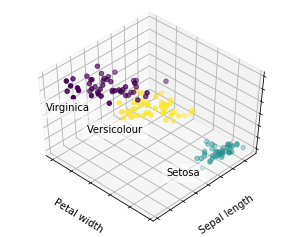

In [364]:
%matplotlib inline
print(__doc__)

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}


fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

Don’t over-interpret clustering results

#### Application example: vector quantization

Clustering in general and KMeans, in particular, can be seen as a way of choosing a small number of exemplars to compress the information. The problem is sometimes known as vector quantization. For instance, this can be used to posterize an image:

In [366]:
>>> import scipy as sp
>>> try:
...    face = sp.face(gray=True)
... except AttributeError:
...    from scipy import misc
...    face = misc.face(gray=True)
>>> X = face.reshape((-1, 1)) # We need an (n_sample, n_feature) array
>>> k_means = cluster.KMeans(n_clusters=5, n_init=1)
>>> k_means.fit(X) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [367]:
>>> values = k_means.cluster_centers_.squeeze()
>>> labels = k_means.labels_
>>> face_compressed = np.choose(labels, values)
>>> face_compressed.shape = face.shape

Automatically created module for IPython interactive environment


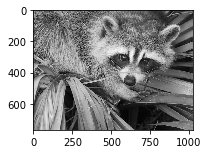

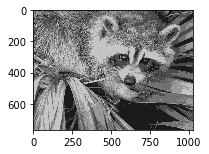

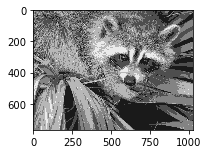

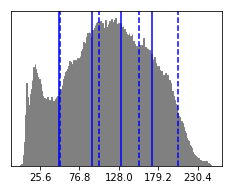

In [371]:
# Vector Quantization Example

print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn.utils.testing import SkipTest
from sklearn.utils.fixes import sp_version

if sp_version < (0, 12):
    raise SkipTest("Skipping because SciPy version earlier than 0.12.0 and "
                   "thus does not include the scipy.misc.face() image.")

try:
    face = sp.face(gray=True)
except AttributeError:
    # Newer versions of scipy have face in misc
    from scipy import misc
    face = misc.face(gray=True)

n_clusters = 5
np.random.seed(0)

X = face.reshape((-1, 1))  # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

# create an array from labels and values
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

vmin = face.min()
vmax = face.max()

# original face
plt.figure(1, figsize=(3, 2.2))
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=256)

# compressed face
plt.figure(2, figsize=(3, 2.2))
plt.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

# equal bins face
regular_values = np.linspace(0, 256, n_clusters + 1)
regular_labels = np.searchsorted(regular_values, face) - 1
regular_values = .5 * (regular_values[1:] + regular_values[:-1])  # mean
regular_face = np.choose(regular_labels.ravel(), regular_values, mode="clip")
regular_face.shape = face.shape
plt.figure(3, figsize=(3, 2.2))
plt.imshow(regular_face, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

# histogram
plt.figure(4, figsize=(3, 2.2))
plt.clf()
plt.axes([.01, .01, .98, .98])
plt.hist(X, bins=256, color='.5', edgecolor='.5')
plt.yticks(())
plt.xticks(regular_values)
values = np.sort(values)
for center_1, center_2 in zip(values[:-1], values[1:]):
    plt.axvline(.5 * (center_1 + center_2), color='b')

for center_1, center_2 in zip(regular_values[:-1], regular_values[1:]):
    plt.axvline(.5 * (center_1 + center_2), color='b', linestyle='--')

plt.show()

#### Hierarchical agglomerative clustering: Ward

A Hierarchical clustering method is a type of cluster analysis that aims to build a hierarchy of clusters. In general, the various approaches of this technique are either:

- Agglomerative - bottom-up approaches: each observation starts in its own cluster, and clusters are iterativelly merged in such a way to minimize a linkage criterion. This approach is particularly interesting when the clusters of interest are made of only a few observations. When the number of clusters is large, it is much more computationally efficient than k-means.

- Divisive - top-down approaches: all observations start in one cluster, which is iteratively split as one moves down the hierarchy. For estimating large numbers of clusters, this approach is both slow (due to all observations starting as one cluster, which it splits recursively) and statistically ill-posed.

##### Connectivity-constrained clustering

With agglomerative clustering, it is possible to specify which samples can be clustered together by giving a connectivity graph. Graphs in the scikit are represented by their adjacency matrix. Often, a sparse matrix is used. This can be useful, for instance, to retrieve connected regions (sometimes also referred to as connected components) when clustering an image:

In [376]:
import matplotlib.pyplot as plt

from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils.testing import SkipTest
from sklearn.utils.fixes import sp_version

if sp_version < (0, 12):
    raise SkipTest("Skipping because SciPy version earlier than 0.12.0 and "
                   "thus does not include the scipy.misc.face() image.")


###############################################################################
# Generate data
try:
    face = sp.face(gray=True)
except AttributeError:
    # Newer versions of scipy have face in misc
    from scipy import misc
    face = misc.face(gray=True)

# Resize it to 10% of the original size to speed up the processing
face = sp.misc.imresize(face, 0.10) / 255.

#plt.imshow(face)

#### Feature agglomeration

We have seen that sparsity could be used to mitigate the curse of dimensionality, i.e an insufficient amount of observations compared to the number of features. Another approach is to merge together similar features: feature agglomeration. This approach can be implemented by clustering in the feature direction, in other words **clustering the transposed data.**

In [381]:
>>> digits = datasets.load_digits()
>>> images = digits.images
>>> X = np.reshape(images, (len(images), -1))
>>> connectivity = grid_to_graph(*images[0].shape)
>>> agglo = cluster.FeatureAgglomeration(connectivity=connectivity,n_clusters=32)
>>> agglo.fit(X) 

FeatureAgglomeration(affinity='euclidean', compute_full_tree='auto',
           connectivity=<64x64 sparse matrix of type '<class 'numpy.int64'>'
	with 288 stored elements in COOrdinate format>,
           linkage='ward', memory=Memory(cachedir=None), n_clusters=32,
           pooling_func=<function mean at 0x114bb4378>)

In [382]:
>>> X_reduced = agglo.transform(X)
>>> X_approx = agglo.inverse_transform(X_reduced)
>>> images_approx = np.reshape(X_approx, images.shape)

#### transform and inverse_transform methods

Some estimators expose a transform method, for instance to reduce the dimensionality of the dataset.

### Decompositions: from a signal to components and loadings

####  Components and loadings

If X is our multivariate data, then the problem that we are trying to solve is to rewrite it on a different observational basis: we want to learn loadings L and a set of components C such that X = L C. Different criteria exist to choose the components

#### Principal component analysis: PCA

Principal component analysis (PCA) selects the successive components that explain the maximum variance in the signal.

The point cloud spanned by the observations above is very flat in one direction: one of the three univariate features can almost be exactly computed using the other two. PCA finds the directions in which the data is not flat

When used to transform data, PCA can reduce the dimensionality of the data by projecting on a principal subspace.

In [386]:
>>> # Create a signal with only 2 useful dimensions
>>> x1 = np.random.normal(size=100)
>>> x2 = np.random.normal(size=100)
>>> x3 = x1 + x2
>>> X = np.c_[x1, x2, x3]

>>> from sklearn import decomposition
>>> pca = decomposition.PCA()
>>> pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [387]:
>>> print(pca.explained_variance_)  

[  2.31738328e+00   1.08516214e+00   1.06263258e-32]


In [388]:
>>> # As we can see, only the 2 first components are useful
>>> pca.n_components = 2
>>> X_reduced = pca.fit_transform(X)
>>> X_reduced.shape

(100, 2)

#### Independent Component Analysis: ICA

Independent component analysis (ICA) selects components so that the distribution of their loadings carries a maximum amount of independent information. It is able to recover non-Gaussian independent signals:

In [399]:
>>> # Generate sample data
>>> time = np.linspace(0, 10, 2000)
>>> s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
>>> s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
>>> S = np.c_[s1, s2]
>>> S += 0.2 * np.random.normal(size=S.shape)  # Add noise
>>> S /= S.std(axis=0)  # Standardize data
>>> # Mix data
>>> A = np.array([[1, 1], [0.5, 2]])  # Mixing matrix
>>> X = np.dot(S, A.T)  # Generate observations

>>> # Compute ICA
>>> ica = decomposition.FastICA()
>>> S_ = ica.fit_transform(X)  # Get the estimated sources
>>> A_ = ica.mixing_.T
>>> np.allclose(X,  np.dot(S_, A_) + ica.mean_)

True

## [Putting it all together](http://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html)

### Pipelining

We have seen that some estimators can transform data and that some estimators can predict variables. We can also create combined estimators:


GridSearchCV on pca #components param and log reg. regularization param
(determine number of features to use for best logistic regression estimator with pipeline)

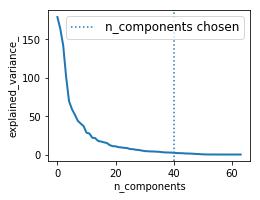

In [403]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

###############################################################################
# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf() # just clears the figure without fully closing
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

###############################################################################
# Prediction

n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))

### Face recognition with eigenfaces

The dataset used in this example is a preprocessed excerpt of the “Labeled Faces in the Wild”, also known as LFW:  
http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

2017-06-23 23:18:11,131 Loading LFW people faces from /Users/austin/scikit_learn_data/lfw_home



Faces recognition example using eigenfaces and SVMs

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

.. _LFW: http://vis-www.cs.umass.edu/lfw/

Expected results for the top 5 most represented people in the dataset:

================== ============ ======= ========== =======
                   precision    recall  f1-score   support
================== ============ ======= ========== =======
     Ariel Sharon       0.67      0.92      0.77        13
     Colin Powell       0.75      0.78      0.76        60
  Donald Rumsfeld       0.78      0.67      0.72        27
    George W Bush       0.86      0.86      0.86       146
Gerhard Schroeder       0.76      0.76      0.76        25
      Hugo Chavez       0.67      0.67      0.67        15
       Tony Blair       0.81      0.69      0.75        36

      avg / total       0.80      0.80      0.80       322
===============

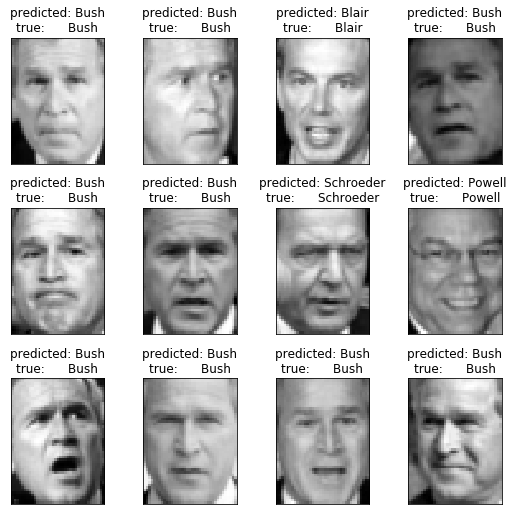

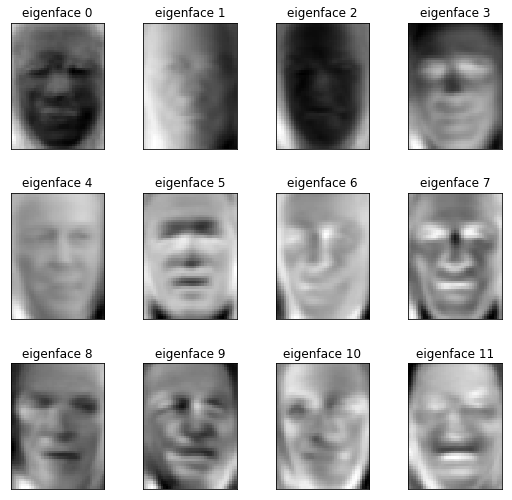

In [407]:
"""
===================================================
Faces recognition example using eigenfaces and SVMs
===================================================

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

.. _LFW: http://vis-www.cs.umass.edu/lfw/

Expected results for the top 5 most represented people in the dataset:

================== ============ ======= ========== =======
                   precision    recall  f1-score   support
================== ============ ======= ========== =======
     Ariel Sharon       0.67      0.92      0.77        13
     Colin Powell       0.75      0.78      0.76        60
  Donald Rumsfeld       0.78      0.67      0.72        27
    George W Bush       0.86      0.86      0.86       146
Gerhard Schroeder       0.76      0.76      0.76        25
      Hugo Chavez       0.67      0.67      0.67        15
       Tony Blair       0.81      0.69      0.75        36

      avg / total       0.80      0.80      0.80       322
================== ============ ======= ========== =======

"""
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


###############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


###############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


###############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


###############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


###############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


###############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()